<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Функции-для-исследовательского-анализа" data-toc-modified-id="Функции-для-исследовательского-анализа-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Функции для исследовательского анализа</a></span></li><li><span><a href="#Таблица-data_arc" data-toc-modified-id="Таблица-data_arc-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Таблица data_arc</a></span></li><li><span><a href="#Таблица-data-bulk" data-toc-modified-id="Таблица-data-bulk-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Таблица data bulk</a></span></li></ul></li></ul></div>

# Выпускной проект: Промышленность

## Описание проекта

Наш заказчик - металлургический комбинат "Стальная птица". Его цель - уменьшить потребление электроэнергии на этапе обработки стали. Для этого предполагается контролировать температуру сплава, с помощью модели, которая будет ее предсказывать, имитируя технологический процесс.

**Описание процесса обработки.**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены на крышке ковша.    
Сначала происходит десульфурация — из стали выводят серу и корректируют её химический состав добавлением примесей. Затем сталь легируют — добавляют в неё куски сплава из бункера для сыпучих материалов или порошковую проволоку через специальный трайб-аппарат.
Прежде чем в первый раз ввести легирующие добавки, специалисты производят химический анализ стали и измеряют её температуру. Потом температуру на несколько минут повышают, уже после этого добавляют легирующие материалы и продувают сталь инертным газом, чтобы перемешать, а затем снова проводят измерения. Такой цикл повторяется до тех пор, пока не будут достигнуты нужный химический состав стали и оптимальная температура плавки.    
Дальше расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

## Описание данных

Данные хранятся в Sqlite  — СУБД, в которой база данных представлена одним файлом. Она состоит из нескольких таблиц:    
- `steel.data_arc` — данные об электродах;
- `steel.data_bulk` — данные об объёме сыпучих материалов;
- `steel.data_bulk_time` — данные о времени подачи сыпучих материалов;
- `steel.data_gas` — данные о продувке сплава газом;
- `steel.data_temp` — данные об измерениях температуры;
- `steel.data_wire` — данные об объёме проволочных материалов;
- `steel.data_wire_time` — данные о времени подачи проволочных материалов.

**Таблица `steel.data_arc`**    
- key — номер партии;
- BeginHeat — время начала нагрева;
- EndHeat — время окончания нагрева;
- ActivePower — значение активной мощности; 
- ReactivePower — значение реактивной мощности.   

**Таблица `steel.data_bulk`**
- key — номер партии;
- Bulk1 … Bulk15 — объём подаваемого материала.   

**Таблица `steel.data_bulk_time`**
- key — номер партии;
- Bulk1 … Bulk15 — время подачи материала.   

**Таблица `steel.data_gas`**
- key — номер партии;
- gas — объём подаваемого газа.   

**Таблица `steel.data_temp`**
- key — номер партии;
- MesaureTime — время замера;
- Temperature — значение температуры.   

**Таблица `steel.data_wire`**
- key — номер партии;
- Wire1 … Wire9 — объём подаваемых проволочных материалов.   

**Таблица `steel.data_wire_time`**
- key — номер партии;
- Wire1 … Wire9 — время подачи проволочных материалов.   

Во всех файлах столбец `key` содержит номер партии. В таблицах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.   

Целевой признак — последняя температура партии. Начальную температуру партии можно использовать как входной признак. Любые другие промежуточные значения температуры приведут к утечке целевого признака, их нельзя использовать как входные.

## План проекта

Предполагаются следующие шаги проекта:
1. **Загрузка данных**
2. **Исследовательский анализ данных**
  1. Проверка данных в каждой таблице
  1. Проверим соответствие таблиц данных условию задачи
  1. Проверим наличие пропусков и аномалий
  1. Примем решение, как поступить с аномальными данными
  1. Сгенерируем новые признаки
  1. Произведем агрегирование данных из нескольких таблиц
  1. Подготовим данные для обучения
1. **Обучение моделей**.
  1. Рассмотрение как минимум трех классов моделей: дерево решений, бустинг, нейронная сеть.
  1. Поиск лучшей модели для предсказания последней измеренной температуры. В качестве метрики следует использовать МАЕ, и не забыть о кросс-валидации.
  1. В процессе поиска лучшей модели произвести подбор гиперпараметров как минимум для одного из класса моделей.
1. **Оценка качества модели** на тестовой выборке.
  1. Произвести тестирование модели на тестовой выборке. Значение МАЕ должно быть менее 6,8.
  1. Дополнительно можно оценить R²
  1. Сранвить значение метрики лучшей модели с константной моделью.
  1. Проанализировать важность признаков.
  1. Для одного из важных признаков произвести дополнительное исследование (рафик зависимости входного и целевого признаков)
1. Написать **общий вывод о работе**, предложить способы дальнейшего улушения модели и составить бизнез-рекомендации заказчику.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Загрузка библиотек

In [2]:
# обновляю библиотеку

!pip install --upgrade scikit-learn -q

In [3]:
# установим библиотеку для sql

!pip install sqlalchemy -q

In [4]:
# библиотеку, возможно, нужно установить

!pip install shap -q

In [5]:
# библиотеку, возможно, нужно установить

!pip install lightgbm -q

In [6]:
# библиотеку, возможно, нужно установить

!pip install catboost -q

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn
import shap
import phik
import lightgbm
import catboost
import torch
import torch.nn as nn

from datetime import datetime, date, time
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sqlalchemy import create_engine, MetaData

from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
# зададим константу студента

RANDOM_STATE = 111124

## Загрузка данных

In [9]:
# вводим данные для подключения к базе

db_config = {
'user': 'praktikum_student',                          # имя пользователя
'pwd': 'Sdf4$2;d-d30pp',                              # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,                                         # порт подключения
'db': 'data-science-final'                            # название базы данных
}

In [10]:
# создаем строку с данными и формируем движок

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

engine = create_engine(connection_string) 

Проверим, какие таблицы представлены в нашей базе. Мы ожидаем увидеть семь таблиц, как следует из данных заказчика.

In [11]:
# создадим объект метадаты и обратимся к таблицам из базы steel

metadata = MetaData()
metadata.reflect(bind=engine, schema='steel')

In [12]:
# выведем список таблиц

print(metadata.tables.keys())

dict_keys(['steel.data_arc', 'steel.data_bulk', 'steel.data_bulk_time', 'steel.data_gas', 'steel.data_temp', 'steel.data_wire', 'steel.data_wire_time'])


Все верно, в нашей базе оказалось действительно семь таблиц.

Изучим сами таблицы на предмет количества строк в них и названий колонок.

In [13]:
# выгрузим размеры и состав колонок таблиц

table_names = ['data_arc', 'data_bulk', 'data_bulk_time', 'data_gas', 'data_temp', 'data_wire', 'data_wire_time']
for table_name in table_names:     # Пройдемся по каждой таблице
    
    table_size_query = f"SELECT COUNT(*) FROM steel.{table_name};"   # Запрос для получения размера таблицы
    table_size = pd.read_sql_query(table_size_query, con=engine)
    
    column_names_query = f"SELECT column_name FROM information_schema.columns WHERE table_name = '{table_name}';"   # Запрос для получения названий колонок
    column_names = pd.read_sql_query(column_names_query, con=engine)
    
    print(f"Таблица: {table_name}")                            # Выведем информацию о таблице
    print(f"Размер: {table_size.iloc[0, 0]} строк")
    print(f"Названия колонок: {', '.join(column_names['column_name'])}\n")

Таблица: data_arc
Размер: 14876 строк
Названия колонок: key, BeginHeat, EndHeat, ActivePower, ReactivePower

Таблица: data_bulk
Размер: 3129 строк
Названия колонок: key, Bulk 1, Bulk 2, Bulk 3, Bulk 4, Bulk 5, Bulk 6, Bulk 7, Bulk 8, Bulk 9, Bulk 10, Bulk 11, Bulk 12, Bulk 13, Bulk 14, Bulk 15

Таблица: data_bulk_time
Размер: 3129 строк
Названия колонок: key, Bulk 1, Bulk 2, Bulk 3, Bulk 4, Bulk 5, Bulk 6, Bulk 7, Bulk 8, Bulk 9, Bulk 10, Bulk 11, Bulk 12, Bulk 13, Bulk 14, Bulk 15

Таблица: data_gas
Размер: 3239 строк
Названия колонок: key, gas

Таблица: data_temp
Размер: 15907 строк
Названия колонок: key, MesaureTime, Temperature

Таблица: data_wire
Размер: 3081 строк
Названия колонок: key, Wire 1, Wire 2, Wire 3, Wire 4, Wire 5, Wire 6, Wire 7, Wire 8, Wire 9

Таблица: data_wire_time
Размер: 3081 строк
Названия колонок: key, Wire 1, Wire 2, Wire 3, Wire 4, Wire 5, Wire 6, Wire 7, Wire 8, Wire 9



Что же, количество строк в таблицах отличается. От 3081 до 15907. Также можно видеть, что названия столбцов при загрузке данных будет необходимо привести к единообразию. 

Также в первой таблице у нас есть столбцы с указанием времени начала нагрева и окончания нагрева. Проверим, в каком виде эти данные хранятся в таблице.

In [14]:
# создаем запрос на первую таблицу с образцом данных

query_data_arc = '''
SELECT *
FROM steel.data_arc
LIMIT 10;
'''

q_data_arc = pd.read_sql_query(query_data_arc, con= engine)
q_data_arc

,key,BeginHeat,EndHeat,ActivePower,ReactivePower
0,1,11:02:14,11:06:02,0.976059,0.687084
1,1,11:07:28,11:10:33,0.805607,0.520285
2,1,11:11:44,11:14:36,0.744363,0.498805
3,1,11:18:14,11:24:19,1.659363,1.062669
4,1,11:26:09,11:28:37,0.692755,0.414397
5,2,11:34:14,11:36:31,0.438063,0.283043
6,2,11:38:50,11:44:28,1.296415,0.892914
7,2,11:46:19,11:48:25,0.490377,0.305281
8,2,11:49:48,11:53:18,0.827743,0.516874
9,3,12:06:54,12:11:34,1.062053,0.671494


Что же, время тут у нас в часах, минутах и секундах. А вот день не указан, поэтому могут возникнуть сложности при переходе из одного дня в другой, если производство непрерывное.

In [15]:
# загрузка таблицы data_arc целиком

case_ids = '''
    SELECT *
    FROM steel.data_arc;
'''
data_arc = pd.read_sql_query(case_ids, con=engine)
data_arc.columns = ['key', 'begin_heat', 'end_heat', 'active_power', 'reactive_power']

data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   begin_heat      14876 non-null  object 
 2   end_heat        14876 non-null  object 
 3   active_power    14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [16]:
# загрузка таблицы data_bulk целиком

case_ids = '''
    SELECT *
    FROM steel.data_bulk;
'''
data_bulk = pd.read_sql_query(case_ids, con=engine)
data_bulk.columns = [column.lower().replace(' ', '_') for column in data_bulk.columns]

data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [17]:
# загрузка таблицы data_bulk_time целиком

case_ids = '''
    SELECT *
    FROM steel.data_bulk_time;
'''
data_bulk_time = pd.read_sql_query(case_ids, con=engine)
data_bulk_time.columns = [column.lower().replace(' ', '_') for column in data_bulk_time.columns]

data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   bulk_1   252 non-null    object
 2   bulk_2   22 non-null     object
 3   bulk_3   1298 non-null   object
 4   bulk_4   1014 non-null   object
 5   bulk_5   77 non-null     object
 6   bulk_6   576 non-null    object
 7   bulk_7   25 non-null     object
 8   bulk_8   1 non-null      object
 9   bulk_9   19 non-null     object
 10  bulk_10  176 non-null    object
 11  bulk_11  177 non-null    object
 12  bulk_12  2450 non-null   object
 13  bulk_13  18 non-null     object
 14  bulk_14  2806 non-null   object
 15  bulk_15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [18]:
# загрузка таблицы data_gas целиком

case_ids = '''
    SELECT *
    FROM steel.data_gas;
'''
data_gas = pd.read_sql_query(case_ids, con=engine)

data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [19]:
# загрузка таблицы data_temp целиком

case_ids = '''
    SELECT *
    FROM steel.data_temp;
'''
data_temp = pd.read_sql_query(case_ids, con=engine)
data_temp.columns = ['key', 'measure_time', 'temp']
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   measure_time  15907 non-null  object 
 2   temp          13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [20]:
# загрузка таблицы data_wire целиком

case_ids = '''
    SELECT *
    FROM steel.data_wire;
'''
data_wire = pd.read_sql_query(case_ids, con=engine)
data_wire.columns = [column.lower().replace(' ', '_') for column in data_wire.columns]

data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [21]:
# загрузка таблицы data_wire_time целиком

case_ids = '''
    SELECT *
    FROM steel.data_wire_time;
'''
data_wire_time = pd.read_sql_query(case_ids, con=engine)
data_wire_time.columns = [column.lower().replace(' ', '_') for column in data_wire_time.columns]

data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3055 non-null   object
 2   wire_2  1079 non-null   object
 3   wire_3  63 non-null     object
 4   wire_4  14 non-null     object
 5   wire_5  1 non-null      object
 6   wire_6  73 non-null     object
 7   wire_7  11 non-null     object
 8   wire_8  19 non-null     object
 9   wire_9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


Данные загружены. Количество таблиц соответствует ожиданиям. Во всех таблицах есть данные.

Переходим к анализу этих таблиц.

## Исследовательский анализ данных

### Функции для исследовательского анализа

In [22]:
sns.set_theme(style="whitegrid")

In [23]:
# функция для вывода основной информации по признакам

def dataframe_summary(data: pd.DataFrame) -> pd.DataFrame:
    '''Создание DataFrame с информацией по признакам'''
    column_info = {
        'data type': data.dtypes,
        'count passes': data.isnull().sum(),
        'count duplicates': data.duplicated().sum()
    }
    numerical_cols = data.select_dtypes(include=['number'])
    q1 = numerical_cols.quantile(0.25, axis=0)
    q3 = numerical_cols.quantile(0.75, axis=0)
    lower_bound = q1 - 1.5 * (q3 - q1)
    upper_bound = q3 + 1.5 * (q3 - q1)
    outliers = ((numerical_cols < lower_bound) | (numerical_cols > upper_bound)).sum()

    combined_df = pd.concat([
        pd.DataFrame(column_info, index=data.columns).T,
        data.describe().round(2),
        pd.DataFrame(outliers, columns=['emissions']).T,
    ])

    return combined_df

In [24]:
# функция для графиков плотности распределения и боксплота параметра

def graph_numerical_features(data: pd.Series, bins: int, set_lim: list, xlabel: str, title: str) -> plt:
    
    fig = plt.figure(figsize=(15, 6))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1]) 

    ax0 = plt.subplot(gs[0]) 
    sns.histplot(data, ax=ax0, bins=bins, kde=True)
    ax0.set_xlabel('')
    ax0.set_ylabel('Плотность вероятностей')
    ax0.set_title(title)

    ax1 = plt.subplot(gs[1]) 
    sns.boxplot(x=data, ax=ax1, orient='h')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('')

    ax0.set_xlim(set_lim)
    ax1.set_xlim(set_lim)
    plt.tight_layout()
    plt.show()

In [25]:
# создадим функцию для расчета длительности нагрева
# воспользуемся методом today(), так как в наших данных нет метки дня, а только метка времени

def duration(data):
    try:
        begin_heat_time = data["begin_heat"]
        end_heat_time = data["end_heat"]

        if not isinstance(begin_heat_time, time) or not isinstance(end_heat_time, time):
            raise ValueError("begin_heat and end_heat must be datetime.time objects.")

        begin_heat_datetime = datetime.combine(date.today(), begin_heat_time)
        end_heat_datetime = datetime.combine(date.today(), end_heat_time)

        if begin_heat_datetime >= end_heat_datetime:
            raise ValueError("end_heat must be after begin_heat.")

        heat_duration = end_heat_datetime - begin_heat_datetime
        data["heat_duration"] = heat_duration.total_seconds()
        return data

    except KeyError as e:
        return {"error": f"Missing key: {e}"}
    except ValueError as e:
        return {"error": str(e)}

### Таблица data_arc

Для данной таблицы необходимо проделать следующие манипуляции:
1. проверить наличие пропусков и аномалий, изучить распределение признаков.
1. либо удалить всю партию с аномальным значением, либо заменить аномальное значение, основываясь на нормальных наблюдениях.
1. сгенерировать новые признаки, которые могут пригодиться при обучении: 
  1. длительность нагрева, 
  1. общую мощность, 
  1. соотношение активной мощности к реактивной, 
  1. количество запуска нагрева электродами
  1. и другие.
1. агрегировать наблюдения по ключу, учитывая порядок арифметических действий: сначала сгенерировать новые признаки, затем уже агрегировать наблюдения.

Посмотрим на нашу исходную таблицу.

In [26]:
dataframe_summary(data_arc.drop(['key'], axis=1))

,begin_heat,end_heat,active_power,reactive_power
data type,object,object,float64,float64
count passes,0,0,0,0
count duplicates,0,0,0,0
count,NaN,NaN,14876.0,14876.0
mean,NaN,NaN,0.67,0.45
std,NaN,NaN,0.41,5.88
min,NaN,NaN,0.03,-715.5
25%,NaN,NaN,0.4,0.29
50%,NaN,NaN,0.56,0.42
75%,NaN,NaN,0.86,0.64


Как минимум, пока нам видно аномальное значение реактивной мощности - -715,5. А много ли у нас таких аномальных значений?

In [27]:
print(len(data_arc))
print(len(data_arc.query('reactive_power > 0')))

14876
14875


Всего одно значение. Удалим эту строку.

In [28]:
data_arc = data_arc.query('reactive_power > 0')

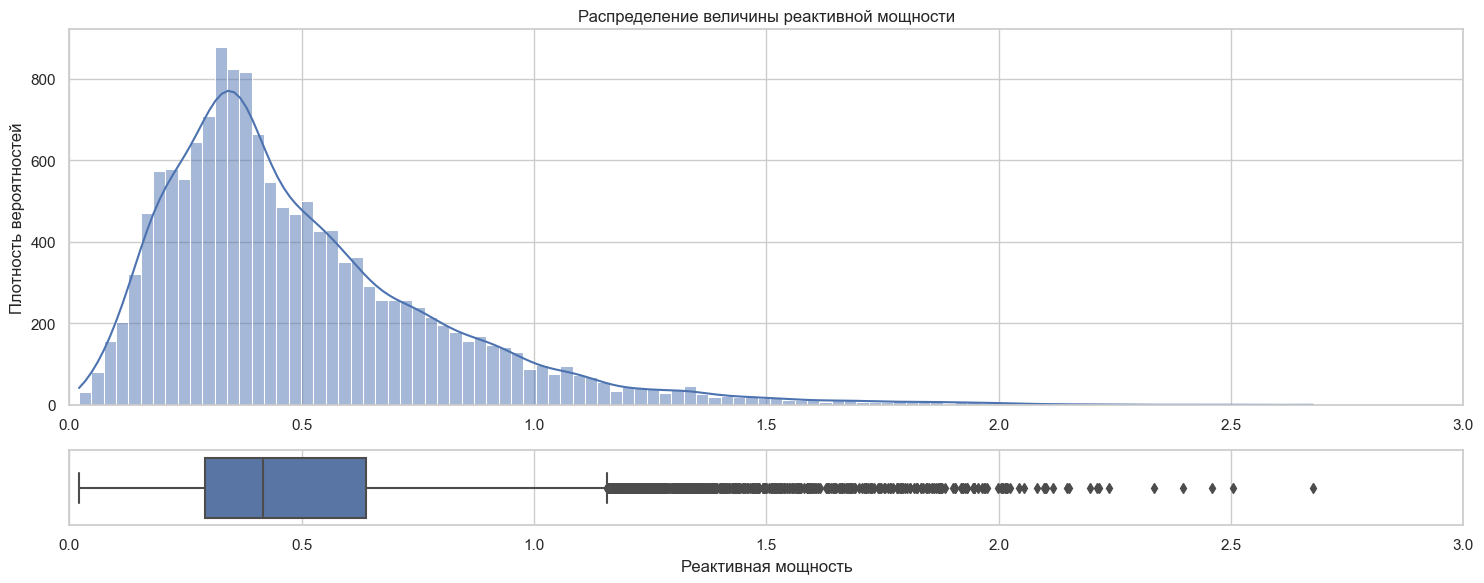

In [29]:
graph_numerical_features(data=data_arc['reactive_power'], bins= 100, set_lim=[0, 3], 
    title='Распределение величины реактивной мощности',
    xlabel='Реактивная мощность')

Можно видеть, что по параметру реактивной мощности в данных была одна строка с аномальными данными. Мы ее удалили. 

Основная масса данных сосредоточена в области 0,3-0,6 реактивной мощности.

Построим аналогичный график для параметра активной мощности.

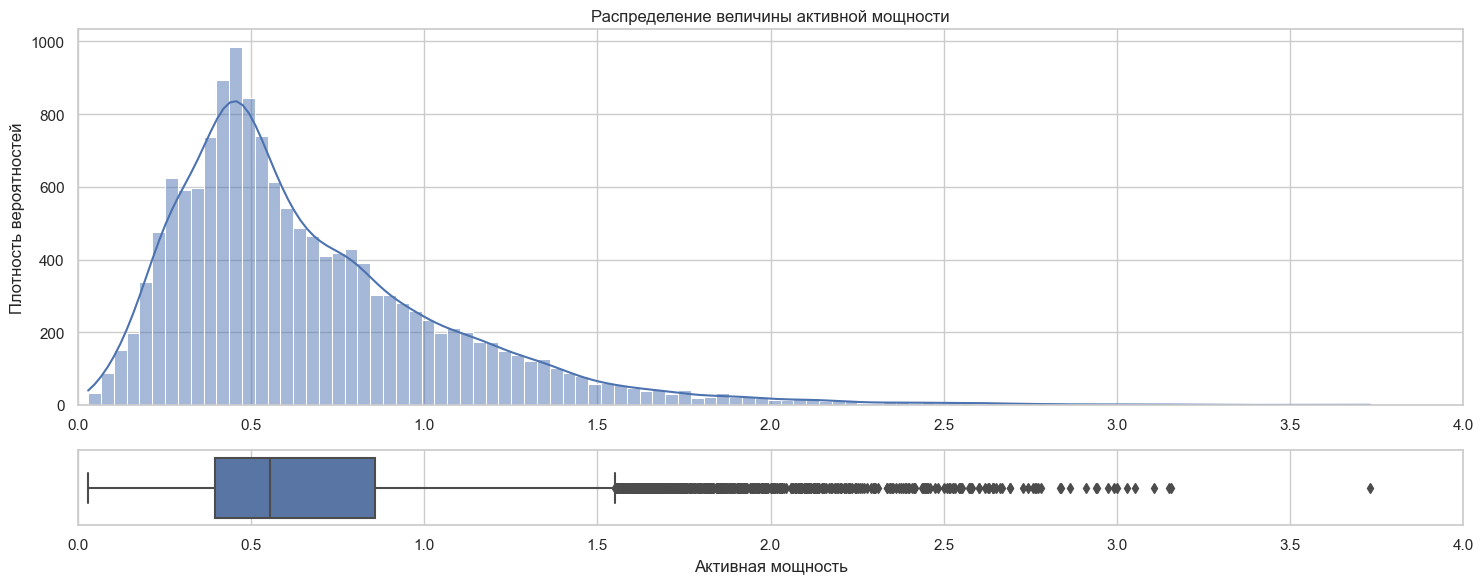

In [30]:
graph_numerical_features(data=data_arc['active_power'], bins= 100, set_lim=[0, 4], 
    title='Распределение величины активной мощности',
    xlabel='Активная мощность')

Оба параметра имеют колоколообразное распределение со смещением пика влево. При этом следует понимать, что сейчас мы смотрим на распределение параметра для каждой операции нагрева, а не для отдельной партии продукции.

Добавим обозначенные ранее признаки в наши данные.
- длительность нагрева `'duration_heat'` - рассчитана как разность между признаками `'begin_heat'` и `'end_heat'`;

- полная мощность `'full_power'` - рассчитана как векторная сумма `'active_power'` ($P$) и `'reactive_power'` ($Q$): $S = √(P² + Q²)$

- коэффициент мощности `'power_coef'` - показатель того, насколько эффективно используется электроэнергия. Он определяется как отношение `'active_power'` к `'full_power'`:
$cosφ = P / S$;
- энергопотребление `'energy'` - рассчитано как произведение `'active_power'` на `'duration_heat'`.
- количество циклов нагрева `'n_heat_cicles'` - рассчитано как число повторений индекса партии в данных.

In [31]:
# применим ее к нашему датафрейму

data_arc = data_arc.apply(duration, axis=1)

In [32]:
# проверим на наличие возникших при обработке функцией ошибок, которые будут обозначены как nan

data_arc['heat_duration'].isna().sum()

22

Удалим эти значения чуть позже, так как сейчас у нас слишком много нечисловых данных в файле. Продолжим пока заниматься генерацией новых признаков.

In [35]:
#

data_arc['full_power'] = data_arc.apply(lambda row: np.sqrt(row['active_power']**2 + row['reactive_power']**2), axis=1)

data_arc['power_coef'] = data_arc.apply(lambda row: row['active_power'] / row['full_power'], axis=1)

data_arc['energy'] = data_arc.apply(lambda row: row['active_power'] * row['heat_duration'], axis=1)

data_arc.head(3)

,active_power,begin_heat,end_heat,error,heat_duration,key,reactive_power,full_power,power_coef,energy
0,0.976059,11:02:14,11:06:02,NaN,228.0,1.0,0.687084,1.193639,0.817717,222.541395
1,0.805607,11:07:28,11:10:33,NaN,185.0,1.0,0.520285,0.959010,0.840041,149.037310
2,0.744363,11:11:44,11:14:36,NaN,172.0,1.0,0.498805,0.896038,0.830728,128.030509


In [36]:
# уберем ненужные на данном этапе признаки

data_arc = data_arc.drop(columns=['begin_heat', 'end_heat', 'error'], axis=1)
data_arc.sample(3)

,active_power,heat_duration,key,reactive_power,full_power,power_coef,energy
12937,0.745961,214.0,2811.0,0.598990,0.956685,0.779735,159.635643
657,0.950529,225.0,142.0,0.672925,1.164617,0.816173,213.868994
12980,0.495524,108.0,2821.0,0.352547,0.608139,0.814820,53.516546


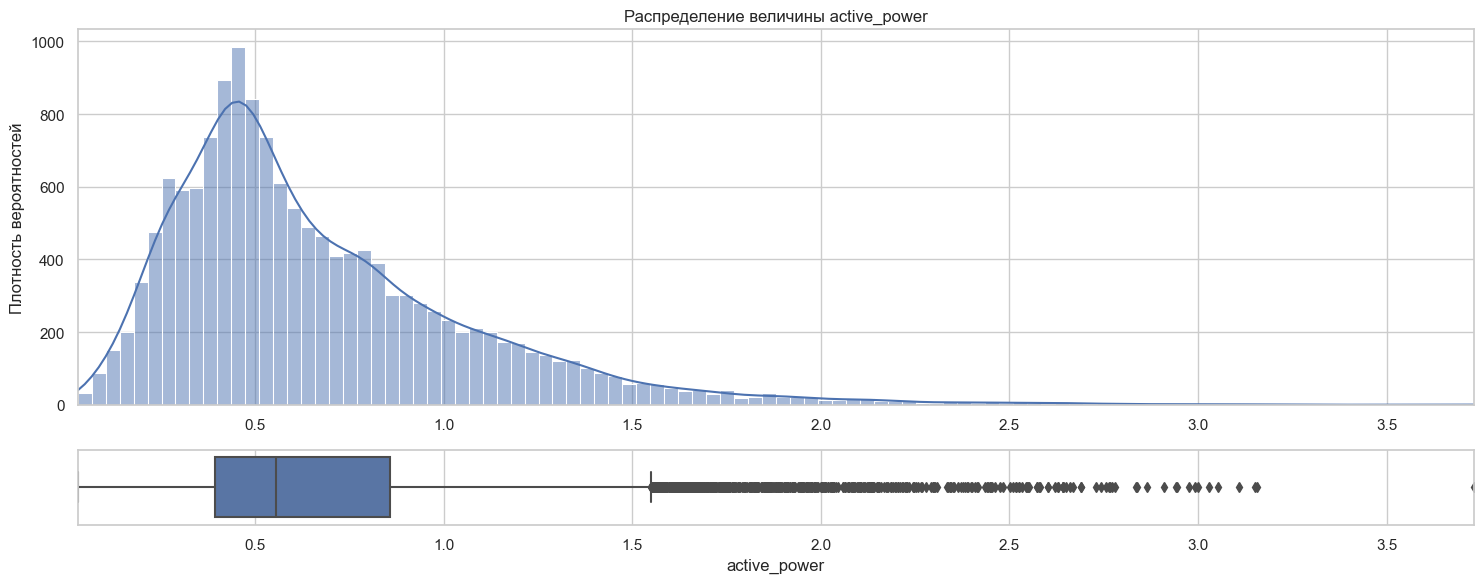

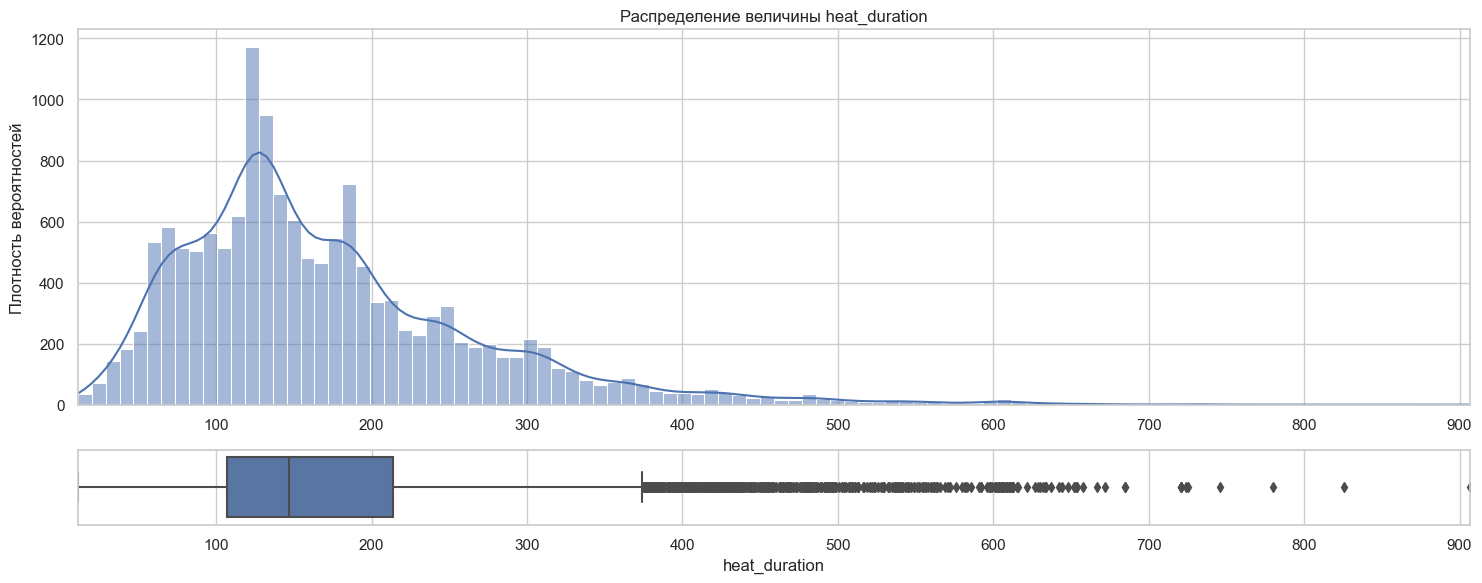

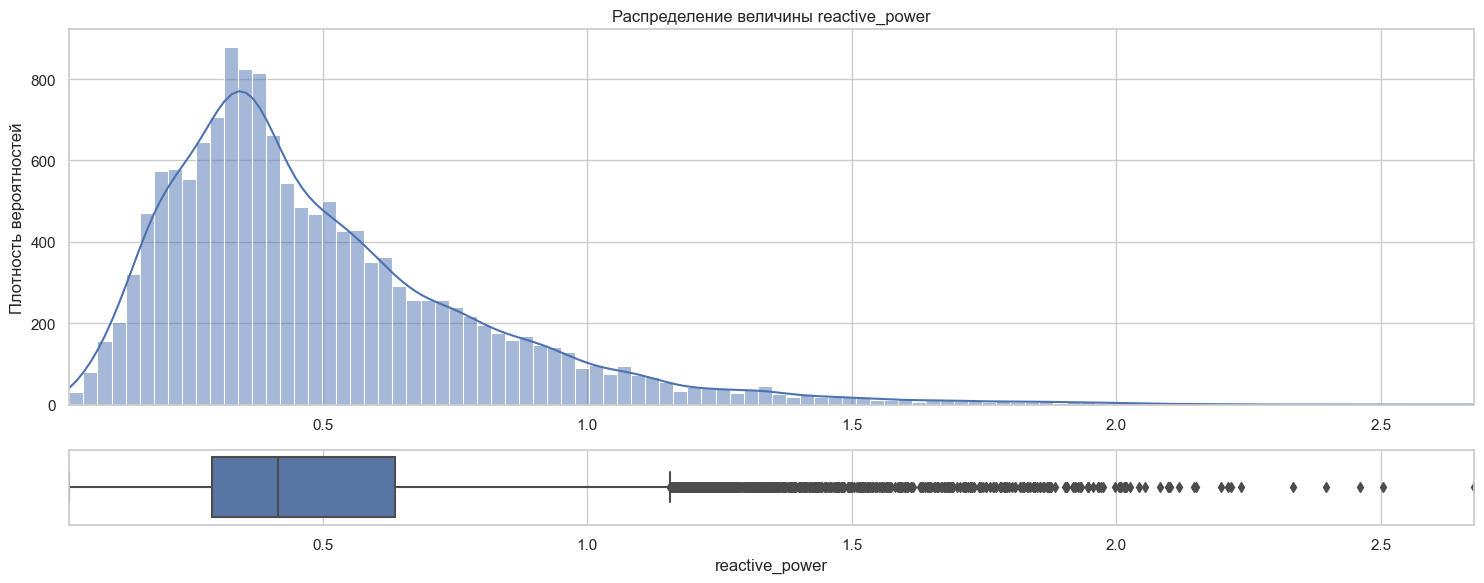

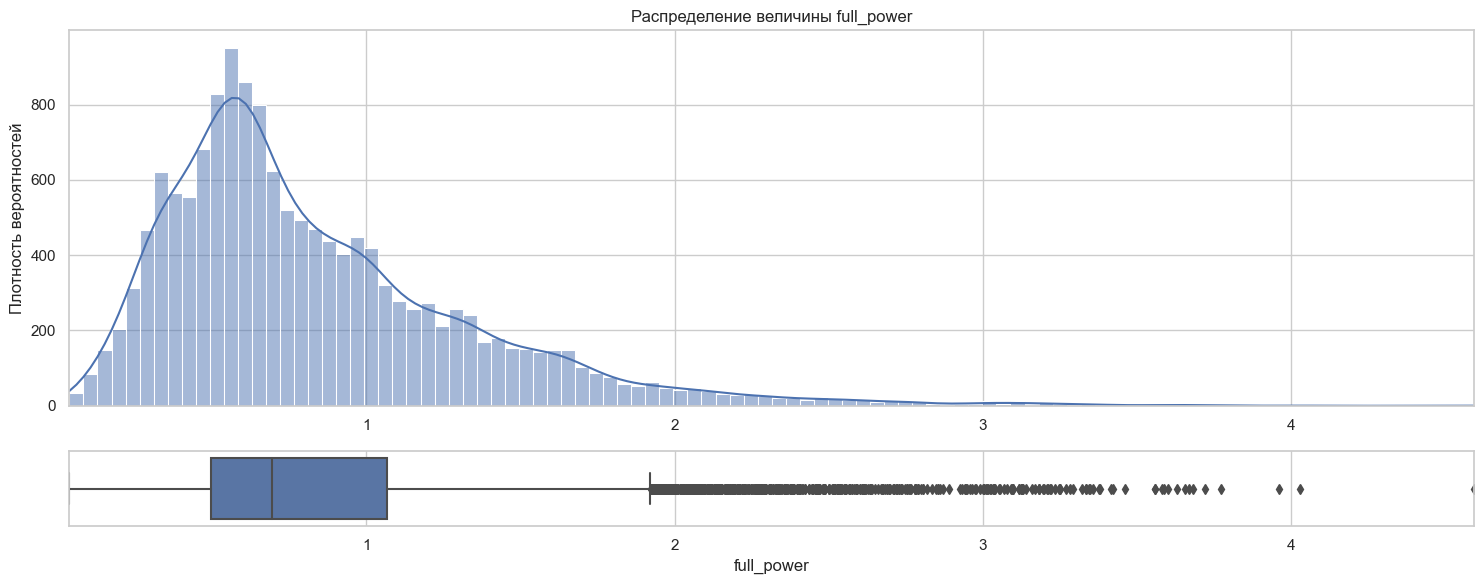

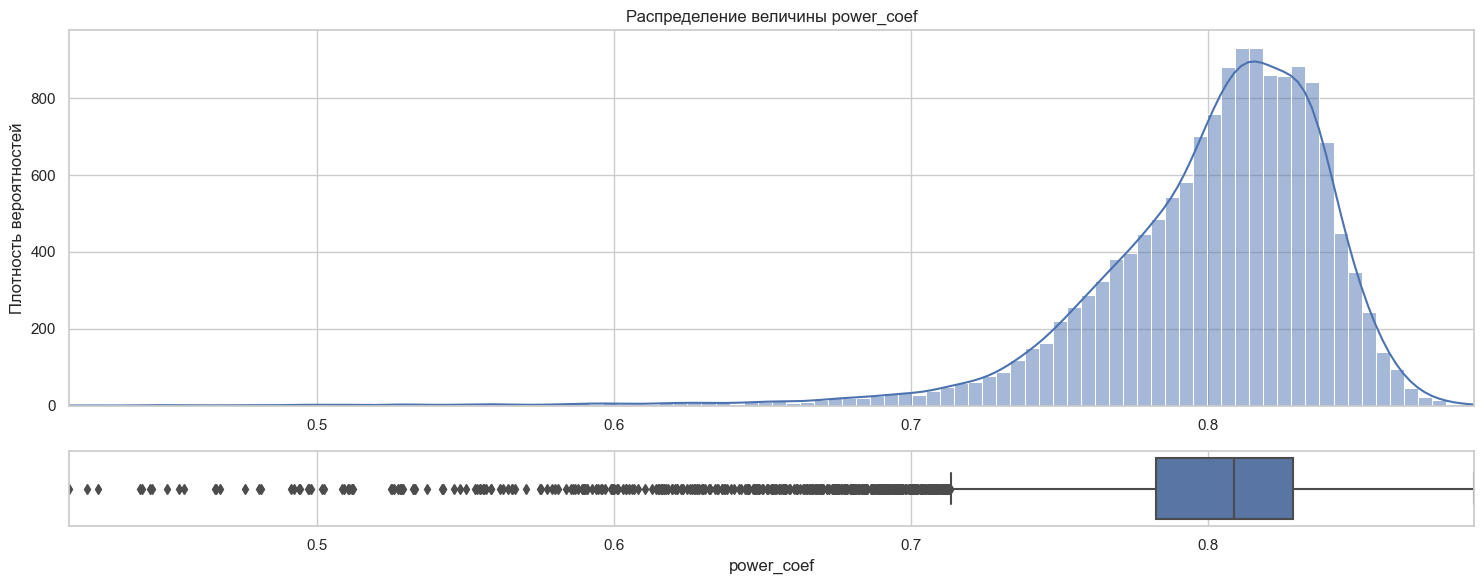

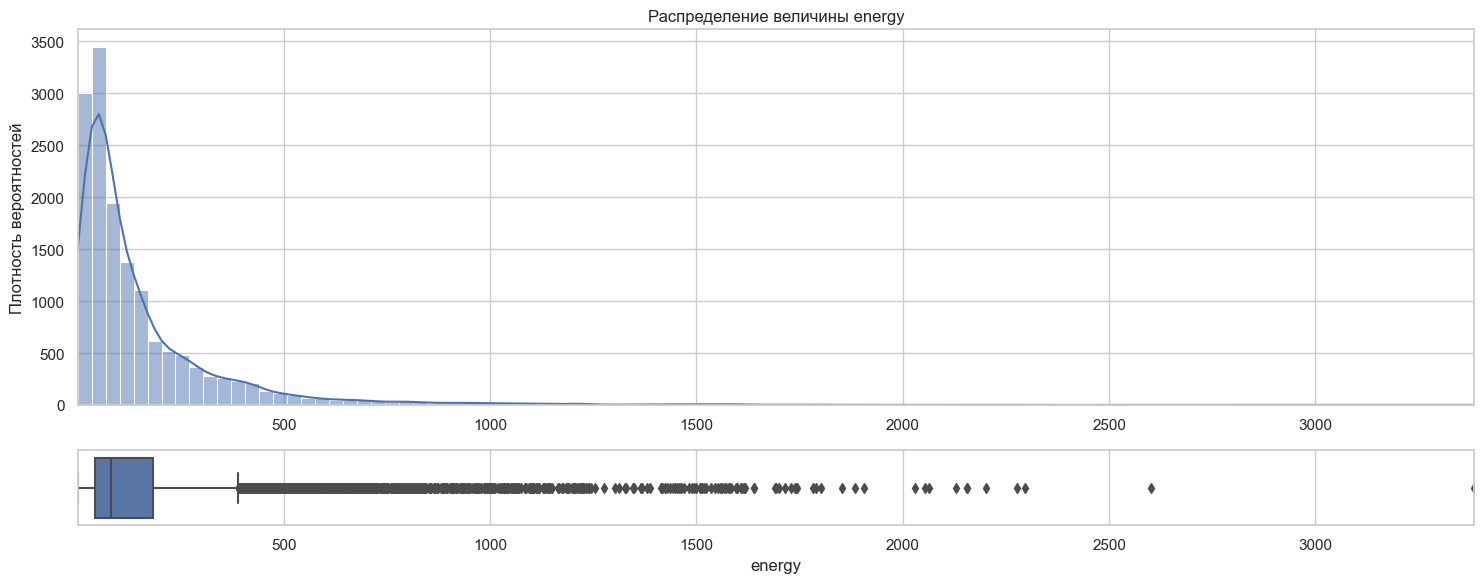

In [38]:
# посмотрим снова на распределения признаков

for col in data_arc.drop(['key'], axis=1).columns:
    val_min = data_arc[col].min()
    val_max = data_arc[col].max()
    graph_numerical_features(
        data=data_arc[col], bins=100, set_lim=[val_min, val_max], 
        title=f'Распределение величины {col}',
        xlabel=col, 
    )

In [39]:
dataframe_summary(data_arc)

,active_power,heat_duration,key,reactive_power,full_power,power_coef,energy
data type,float64,float64,float64,float64,float64,float64,float64
count passes,22,22,22,22,22,22,22
count duplicates,21,21,21,21,21,21,21
count,14853.0,14853.0,14853.0,14853.0,14853.0,14853.0,14853.0
mean,0.67,171.59,1615.35,0.5,0.84,0.8,153.97
std,0.41,98.11,934.69,0.31,0.51,0.04,206.08
min,0.03,11.0,1.0,0.02,0.04,0.42,0.33
25%,0.4,107.0,806.0,0.29,0.5,0.78,42.78
50%,0.56,147.0,1617.0,0.42,0.69,0.81,80.9
75%,0.86,214.0,2429.0,0.64,1.07,0.83,181.76


Признаки `active power`, `heat duration`, `reactive power` и `full power` характеризиуются колоколообразным распределением с более пологим правым "хвостом". Признак `power coef` имеет колоколообразное распределение со смещением вправо. А параметр `energy` в осносном сосредоточен в области до 400 единиц, но имеет весьма длинный "хвост" выбросов. Практически у всех параметров в этом датафрейме среднее значение смещено вправо относительно медианного. Также почти все эти признаки характеризуются наличием одностороннего пологого "хвоста", содержащего выбросы данных.

Произведем агрегацию данных по значению ключа. Сформируем во время объединения колонки с суммарным значением каждого признака, и средним значением.

In [40]:
# агрегация наблюдений и генерация дополнительных признаков

data_arc = data_arc.groupby('key').agg({
    'active_power': ['mean','sum'],
    'reactive_power': ['mean','sum'],
    'heat_duration': ['mean','sum','count'],
    'full_power': ['mean','sum'],
    'power_coef': ['mean','sum'],
    'energy': ['mean','sum'],
})
data_arc.columns = ['_'.join(name) for name in data_arc.columns] 
print('Размеры таблицы:', data_arc.shape)
data_arc.head(3)

Размеры таблицы: (3214, 13)


,active_power_mean,active_power_sum,reactive_power_mean,reactive_power_sum,heat_duration_mean,heat_duration_sum,heat_duration_count,full_power_mean,full_power_sum,power_coef_mean,power_coef_sum,energy_mean,energy_sum
key,,,,,,,,,,,,,
1.0,0.975629,4.878147,0.636648,3.183241,219.60,1098.0,5,1.165279,5.826395,0.837756,4.188779,241.560850,1207.804249
2.0,0.763150,3.052598,0.499528,1.998112,202.75,811.0,4,0.912304,3.649216,0.840158,3.360633,183.454118,733.816470
3.0,0.505176,2.525882,0.319815,1.599076,131.00,655.0,5,0.597907,2.989534,0.845421,4.227104,88.716665,443.583327


In [41]:
dataframe_summary(data_arc)

,active_power_mean,active_power_sum,reactive_power_mean,reactive_power_sum,heat_duration_mean,heat_duration_sum,heat_duration_count,full_power_mean,full_power_sum,power_coef_mean,power_coef_sum,energy_mean,energy_sum
data type,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
count passes,0,0,0,0,0,0,0,0,0,0,0,0,0
count duplicates,0,0,0,0,0,0,0,0,0,0,0,0,0
count,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0,3214.0
mean,0.67,3.1,0.5,2.31,172.26,792.97,4.62,0.84,3.87,0.8,3.7,153.08,711.53
std,0.21,1.4,0.15,1.05,45.58,332.07,1.61,0.25,1.74,0.03,1.3,96.06,514.73
min,0.19,0.19,0.13,0.16,57.0,57.0,1.0,0.23,0.26,0.55,0.7,10.61,10.61
25%,0.52,2.12,0.39,1.59,139.64,569.0,4.0,0.65,2.66,0.79,3.05,85.55,353.37
50%,0.65,2.99,0.49,2.23,168.63,769.0,4.0,0.82,3.74,0.81,3.36,130.01,604.11
75%,0.8,3.9,0.6,2.9,200.5,982.0,6.0,1.0,4.86,0.82,4.35,194.84,927.06


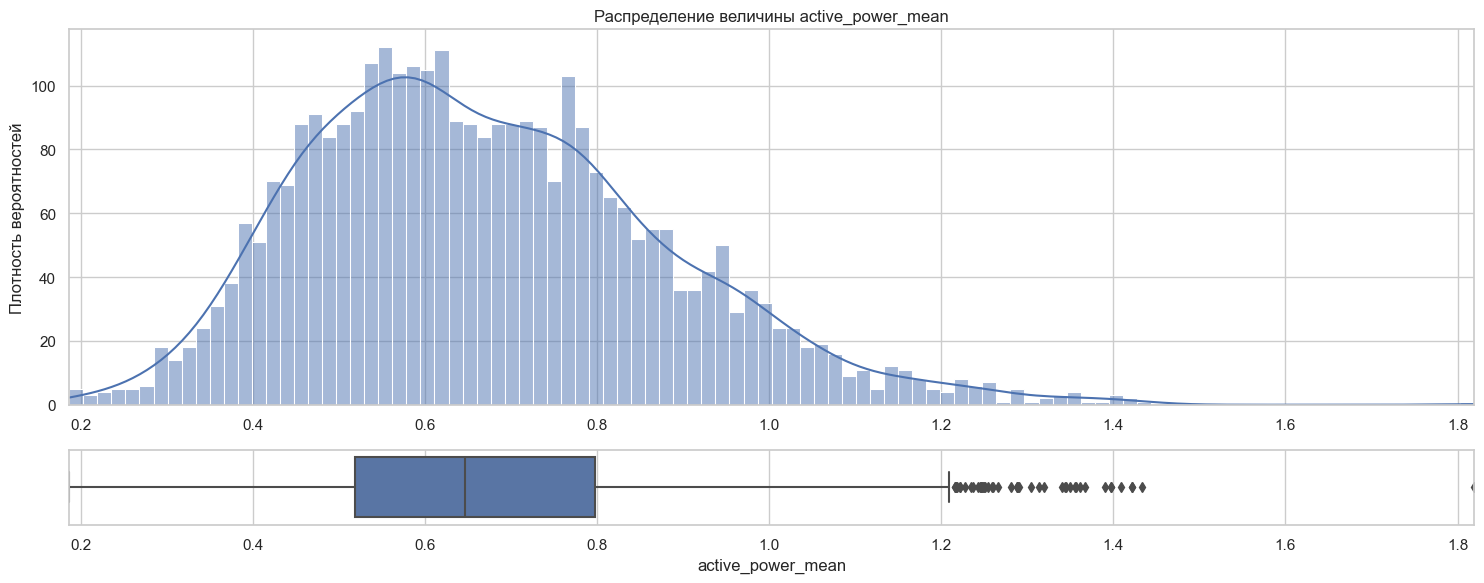

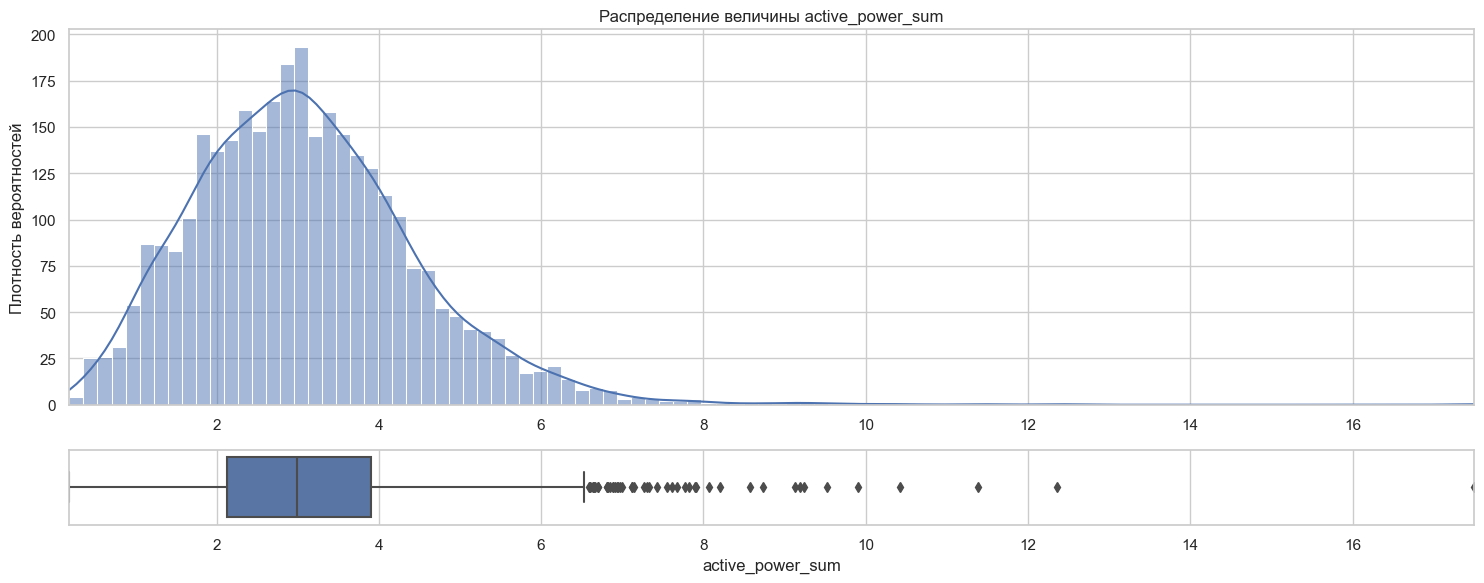

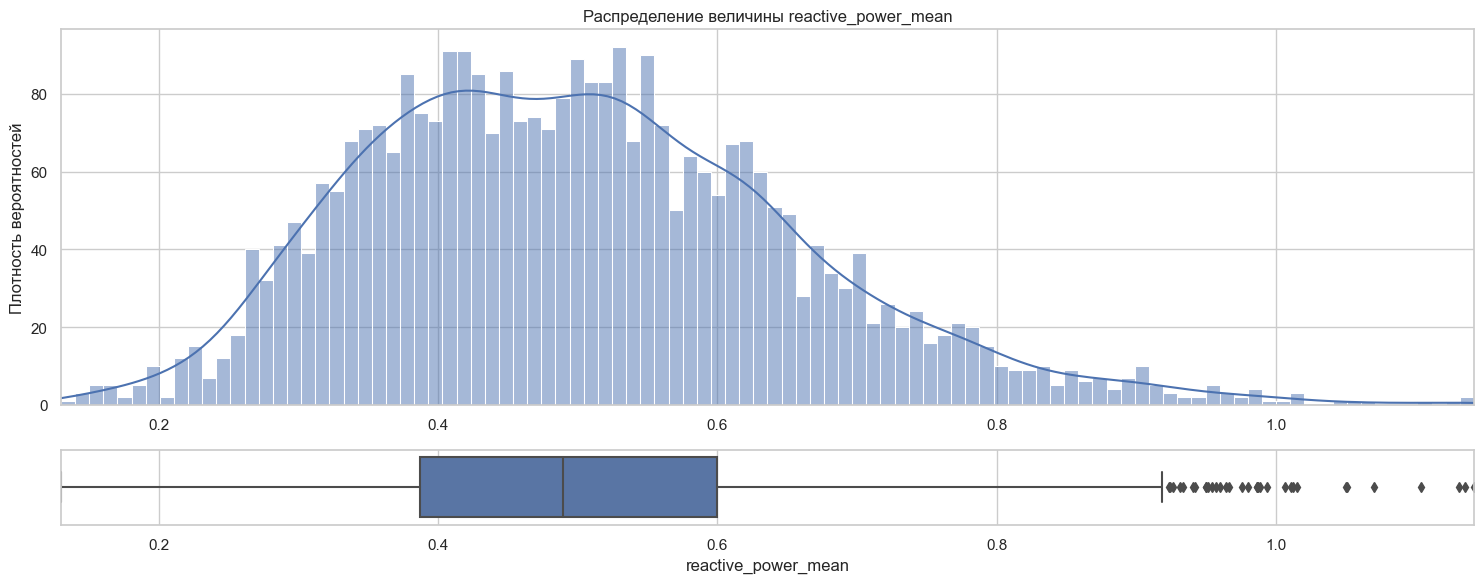

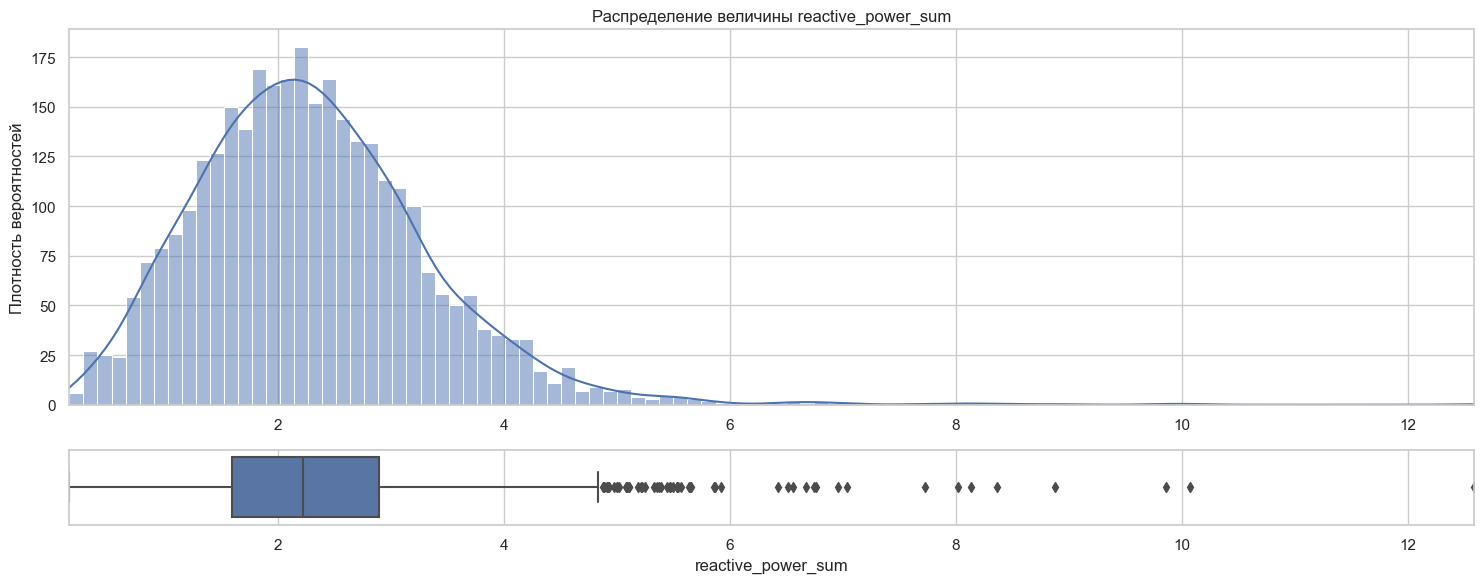

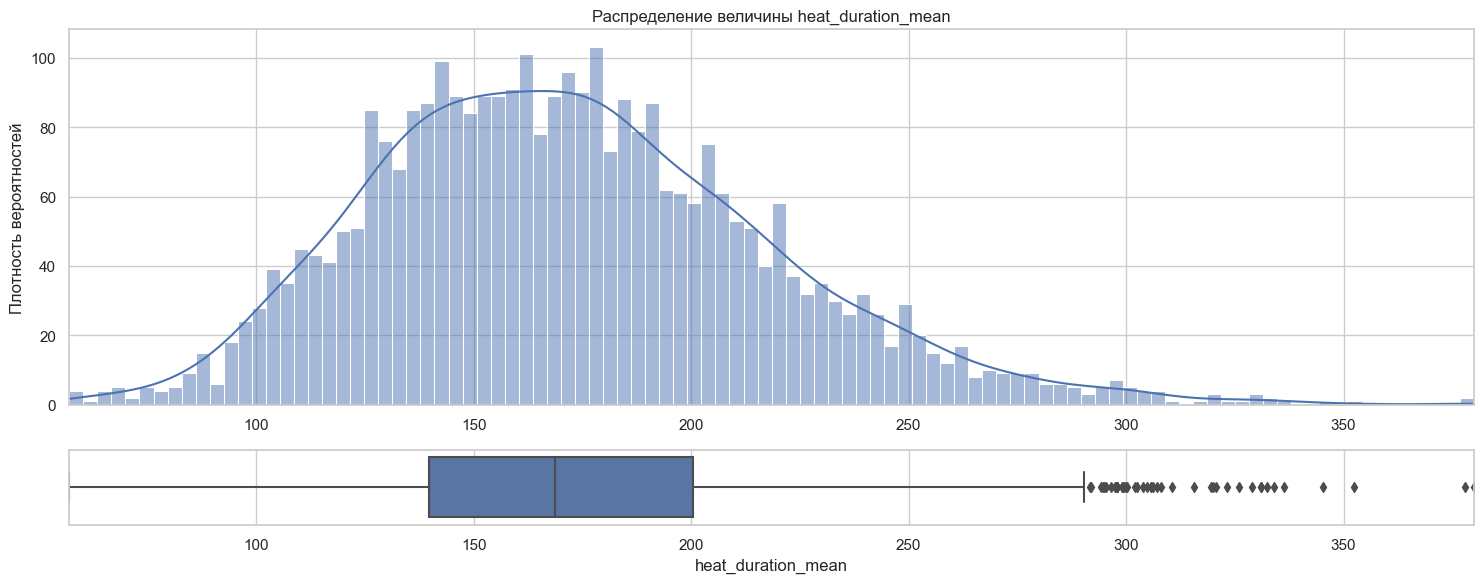

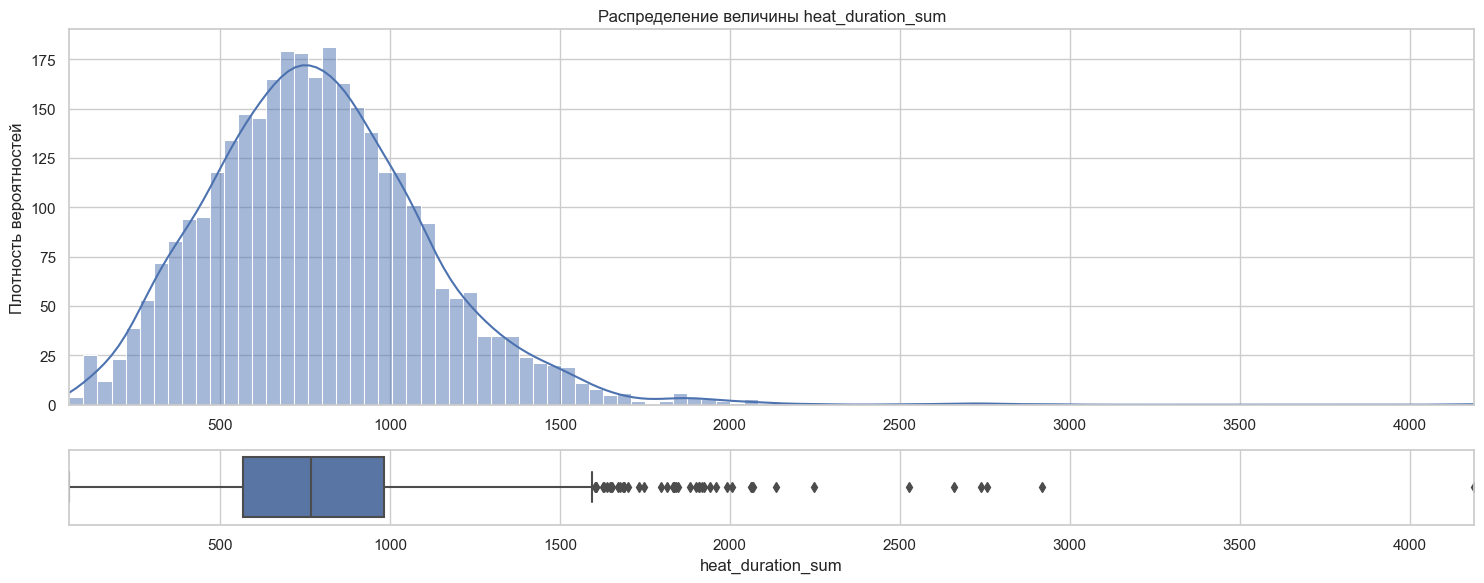

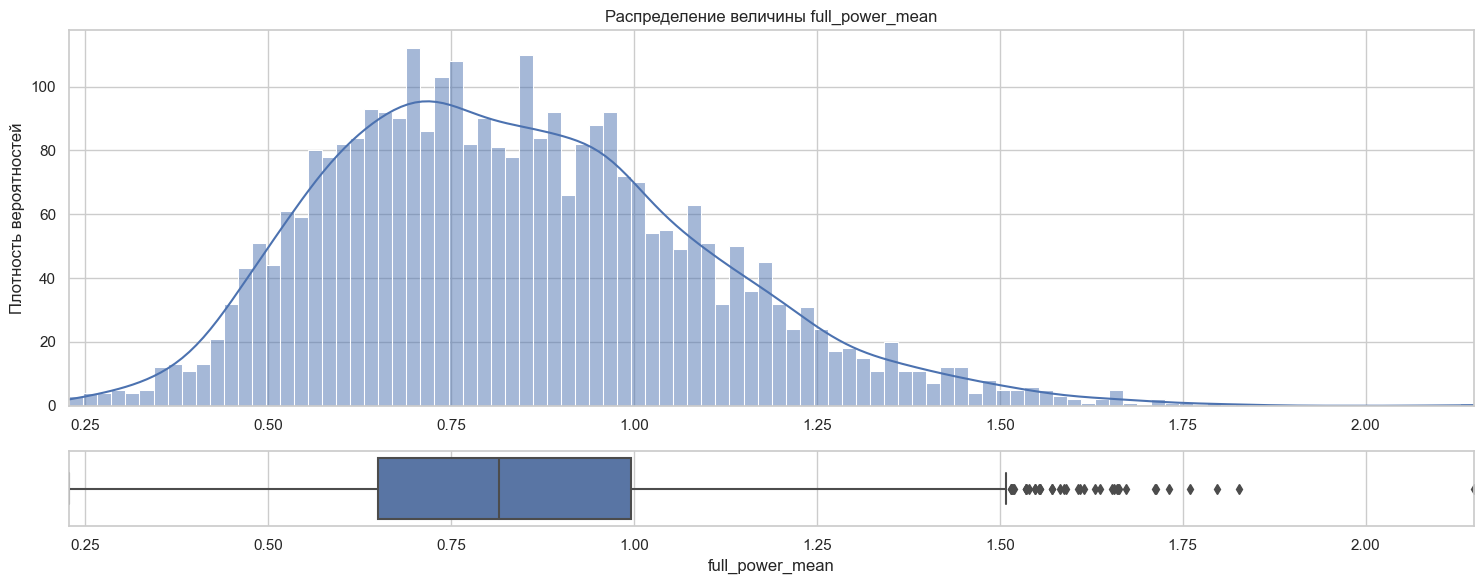

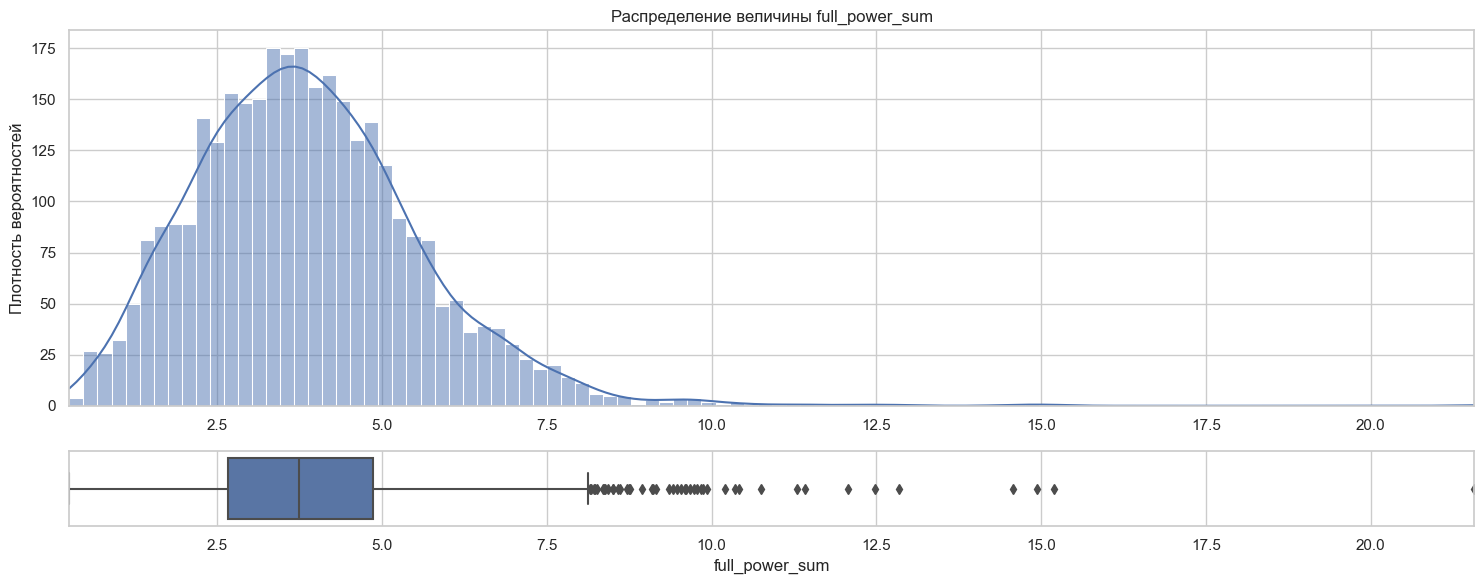

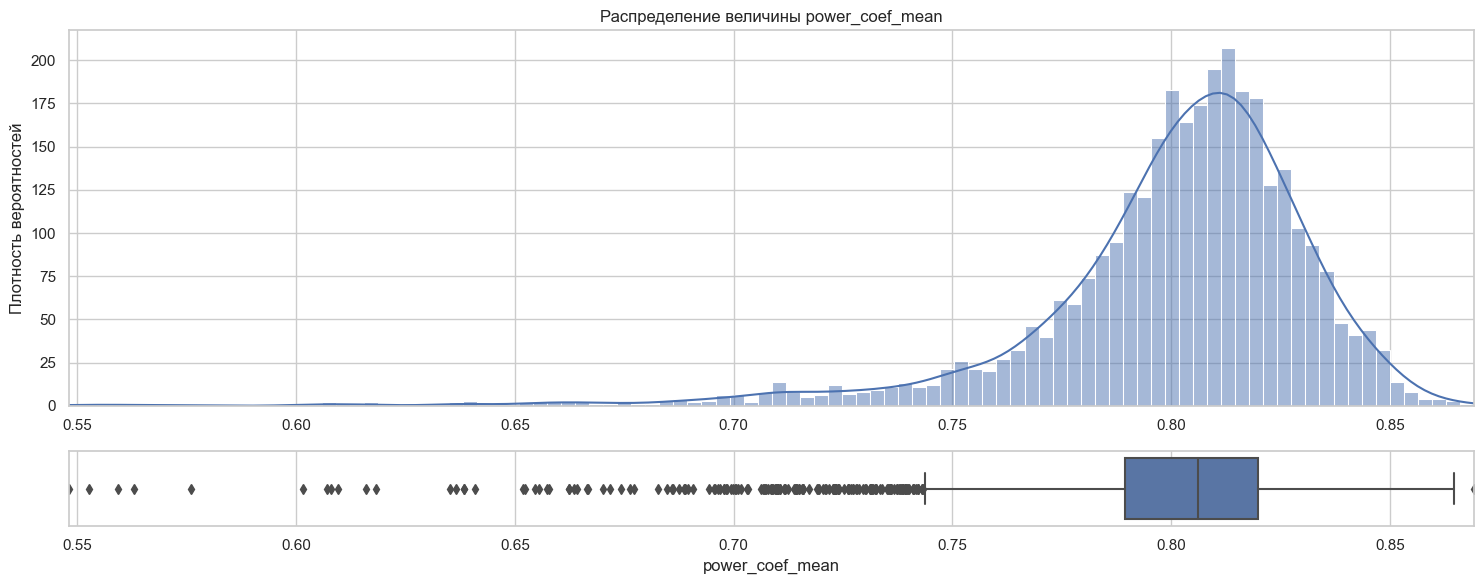

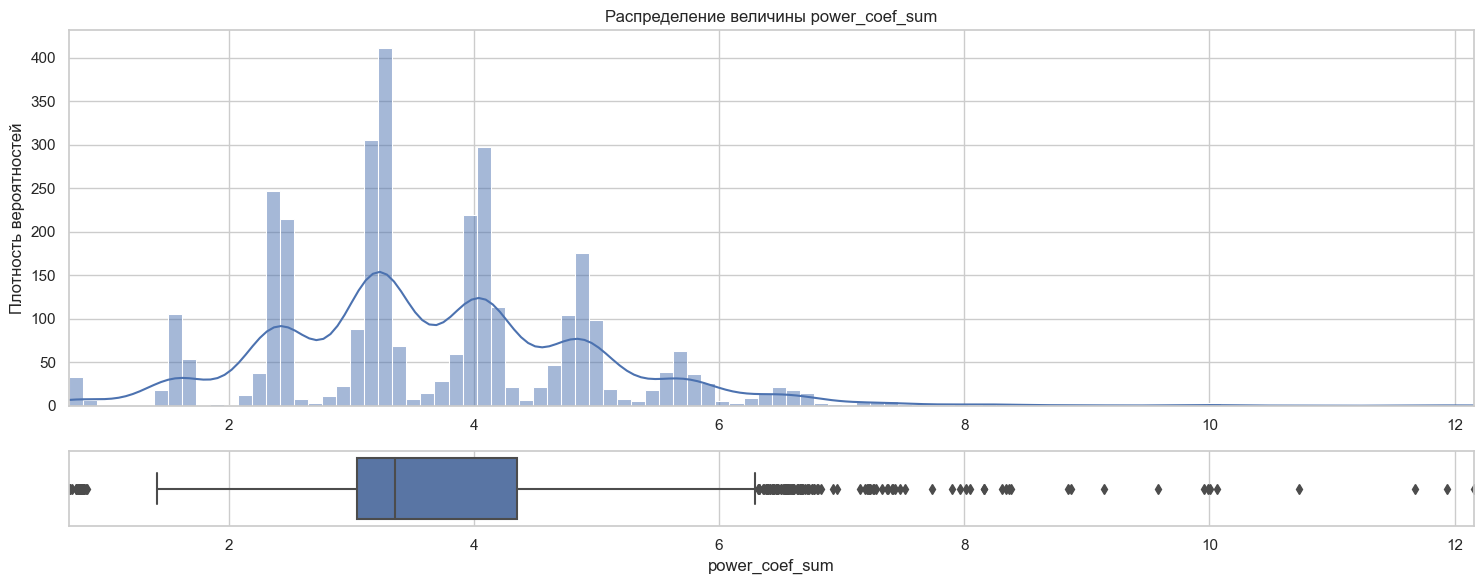

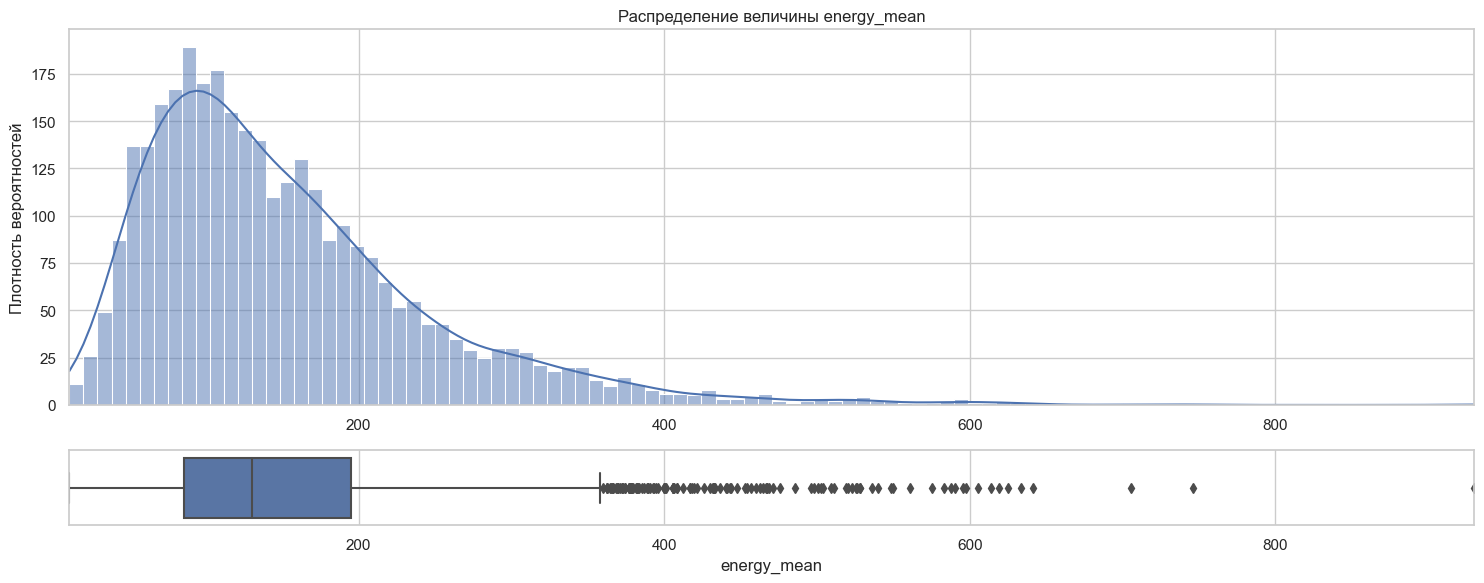

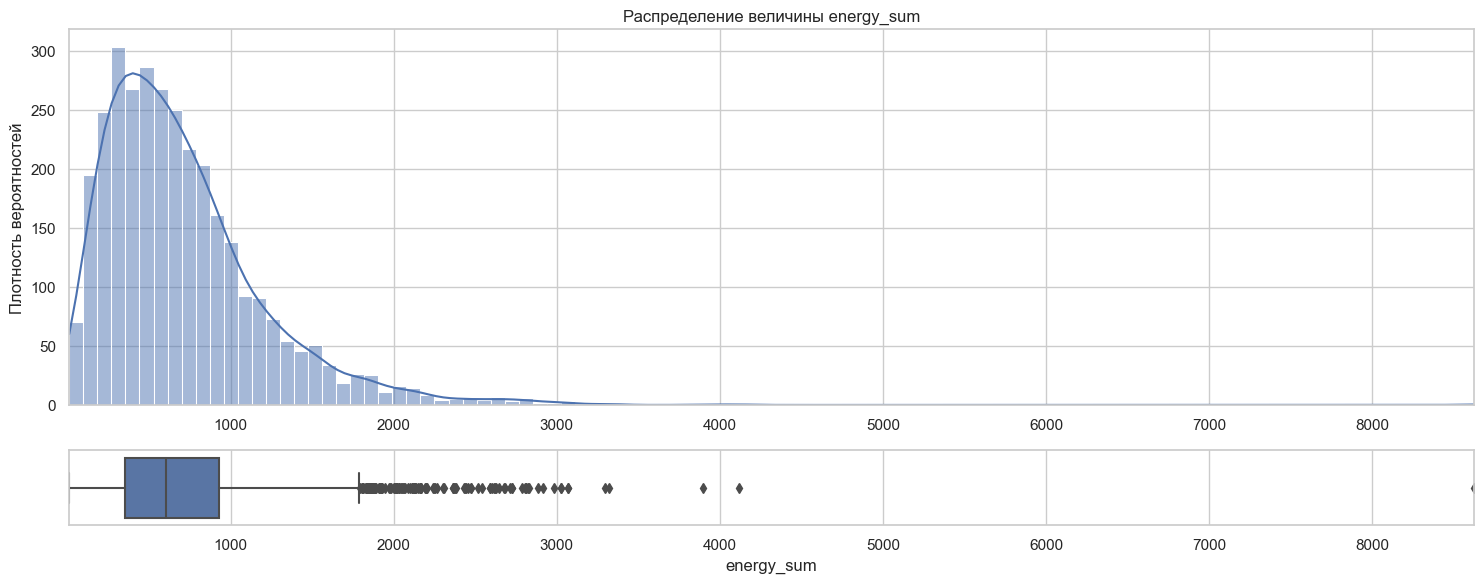

In [44]:
# посмотрим на распределения признаков после агрегации

for col in data_arc.drop(['heat_duration_count'], axis=1).columns:
    val_min = data_arc[col].min()
    val_max = data_arc[col].max()
    graph_numerical_features(
        data=data_arc[col], bins=100, set_lim=[val_min, val_max], 
        title=f'Распределение величины {col}',
        xlabel=col, 
    )

Интересно выглядит график распределения суммы коэффециентов доли активной мощности от общей мощности. Мы видим, что данные распределены с пиками.

И построим отдельно график распределения количества циклов нагрева.

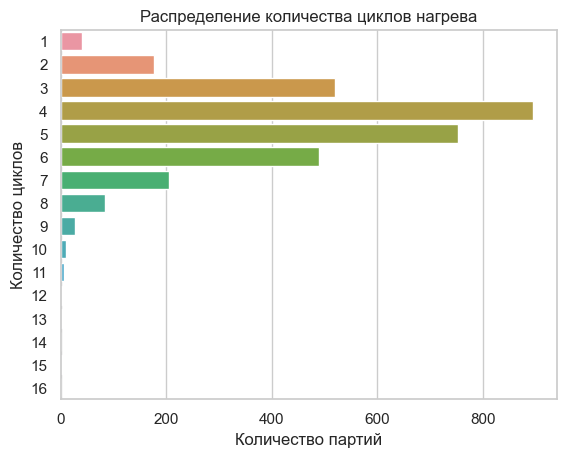

In [45]:
sns.countplot(data=data_arc, y='heat_duration_count');
plt.title('Распределение количества циклов нагрева');
plt.ylabel('Количество циклов');
plt.xlabel('Количество партий');

Основная масса партий выпущена с применением 4-5 циклов нагрева.

### Таблица data bulk